# Import required libraries

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Dataset

In [37]:
df = pd.read_csv(r"data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [38]:
df.shape

(8518, 8)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


# Data Quality issues

In [40]:
df.isnull().sum()

,0
Reviewer Name,10
Review Title,10
Place of Review,50
Up Votes,10
Down Votes,10
Month,465
Review text,8
Ratings,0


In [41]:
(df.isnull().sum() / df.shape[0]) * 100

,0
Reviewer Name,0.117398
Review Title,0.117398
Place of Review,0.586992
Up Votes,0.117398
Down Votes,0.117398
Month,5.459028
Review text,0.093919
Ratings,0.000000


In [42]:
df.duplicated().sum()

np.int64(4)

# Drop duplicate rows

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df['Ratings'].value_counts()

,count
Ratings,
5,5080
4,1745
1,767
3,615
2,307


In [45]:
import warnings
warnings.filterwarnings("ignore")

# Create "sentiment" column

In [46]:
df = df[df['Ratings'] != 3]

df['sentiment'] = df['Ratings'].apply(lambda x: 1 if x >= 4 else 0)

df[['Ratings', 'sentiment']].head()

,Ratings,sentiment
0,4,1
1,1,0
2,1,0
4,1,0
5,5,1


# Combine Review Title + Review Text

In [47]:
df['review'] = df['Review Title'].fillna('') + " " + df['Review text'].fillna('')
df = df[['review', 'sentiment']]
df.head()

,review,sentiment
0,"Nice product Nice product, good quality, but p...",1
1,Don't waste your money They didn't supplied Yo...,0
2,Did not meet expectations Worst product. Damag...,0
4,Over priced Over pricedJust â?¹620 ..from reta...,0
5,Mind-blowing purchase Good quality product. De...,1


# Text Cleaning & Normalization

In [48]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

df['clean_review'] = df['review'].apply(clean_text)
df[['review', 'clean_review']].head()

,review,clean_review
0,"Nice product Nice product, good quality, but p...",nice product nice product good quality price r...
1,Don't waste your money They didn't supplied Yo...,waste money supplied yonex mavis outside cover...
2,Did not meet expectations Worst product. Damag...,meet expectation worst product damaged shuttle...
4,Over priced Over pricedJust â?¹620 ..from reta...,priced pricedjust retailer understand wat adva...
5,Mind-blowing purchase Good quality product. De...,mind blowing purchase good quality product del...


# Exploratory Data Analysis

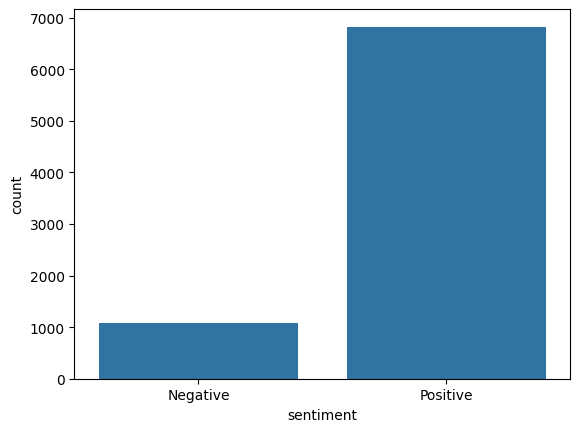

In [49]:
sns.countplot(x='sentiment', data=df)
plt.xticks([0,1], ['Negative','Positive'])
plt.show()

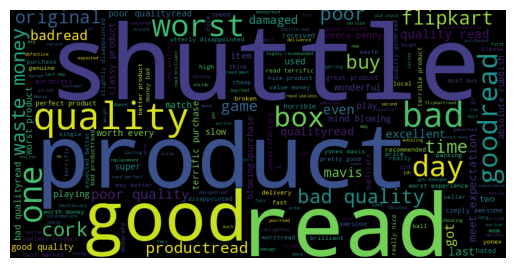

In [50]:
from wordcloud import WordCloud

negative_text = " ".join(df[df['sentiment']==0]['clean_review'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

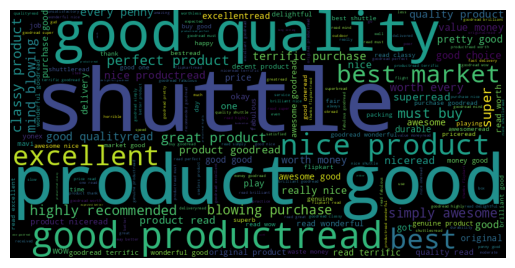

In [51]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['sentiment']==1]['clean_review'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Seperate input and output

In [61]:
X = df['clean_review']
y = df['sentiment']

# Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model Building and hyper parameter tunning

In [54]:
!pip install xgboost
!pip install optuna tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 24.1 MB/s eta 0:00:00


In [67]:
import optuna
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [64]:
def objective(trial):

    # Vectorizer as hyperparameter
    vectorizer_name = trial.suggest_categorical(
        "vectorizer",
        ["bow", "tfidf"]
    )

    max_features = trial.suggest_int("max_features", 3000, 10000)

    if vectorizer_name == "bow":
        vectorizer = CountVectorizer(max_features=max_features)
    else:
        vectorizer = TfidfVectorizer(max_features=max_features)

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Model as hyperparameter
    model_name = trial.suggest_categorical(
        "model",
        ["logistic_regression", "svm", "naive_bayes", "random_forest", "xgboost"]
    )

    # ---------------- Logistic Regression ----------------
    if model_name == "logistic_regression":
        C = trial.suggest_float("lr_C", 0.01, 10.0, log=True)

        model = LogisticRegression(
            C=C,
            max_iter=1000
        )

    # ---------------- Linear SVM ----------------
    elif model_name == "svm":
        C = trial.suggest_float("svm_C", 0.01, 10.0, log=True)
        model = LinearSVC(C=C)

    # ---------------- Naive Bayes ----------------
    elif model_name == "naive_bayes":
        alpha = trial.suggest_float("nb_alpha", 0.01, 2.0)
        model = MultinomialNB(alpha=alpha)

    # ---------------- Random Forest ----------------
    elif model_name == "random_forest":
        n_estimators = trial.suggest_int("rf_n_estimators", 100, 500)
        max_depth = trial.suggest_int("rf_max_depth", 5, 40)

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            n_jobs=-1,
            random_state=42
        )

    # ---------------- XGBoost ----------------
    else:
        n_estimators = trial.suggest_int("xgb_n_estimators", 100, 400)
        max_depth = trial.suggest_int("xgb_max_depth", 3, 10)
        learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 0.3)

        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="binary:logistic",
            eval_metric="logloss",
            n_jobs=-1,
            random_state=42
        )

    # Train & Evaluate
    model.fit(X_train_vec, y_train)
    preds = model.predict(X_test_vec)

    return f1_score(y_test, preds)

In [65]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2026-02-02 17:26:28,933] A new study created in memory with name: no-name-4bf84e6a-4753-4413-8f4b-69825e4f6208
[I 2026-02-02 17:26:29,040] Trial 0 finished with value: 0.9546937296121784 and parameters: {'vectorizer': 'bow', 'max_features': 4281, 'model': 'svm', 'svm_C': 0.8457162415944465}. Best is trial 0 with value: 0.9546937296121784.
[I 2026-02-02 17:26:29,103] Trial 1 finished with value: 0.9519713261648746 and parameters: {'vectorizer': 'bow', 'max_features': 5729, 'model': 'naive_bayes', 'nb_alpha': 0.5867993554788554}. Best is trial 0 with value: 0.9546937296121784.
[I 2026-02-02 17:26:29,878] Trial 2 finished with value: 0.9295199182839632 and parameters: {'vectorizer': 'tfidf', 'max_features': 4123, 'model': 'random_forest', 'rf_n_estimators': 144, 'rf_max_depth': 13}. Best is trial 0 with value: 0.9546937296121784.
[I 2026-02-02 17:26:29,941] Trial 3 finished with value: 0.9354838709677419 and parameters: {'vectorizer': 'tfidf', 'max_features': 4379, 'model': 'naive_baye

In [66]:
print("Best F1 Score:", study.best_value)
print("Best Configuration:")
study.best_params

Best F1 Score: 0.9579288025889967
Best Configuration:


{'vectorizer': 'bow',
 'max_features': 4452,
 'model': 'svm',
 'svm_C': 0.188376410114894}

# Optuna Visualization

In [81]:
# For visualizations
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

# 1. Optimization History
plot_optimization_history(study).show()

In [89]:
# 2. Parallel Coordinates Plot
#plot_parallel_coordinate(study).show()

In [83]:
# 3. Slice Plot
plot_slice(study).show()

In [86]:
# 4. Contour Plot
#plot_contour(study).show()

In [85]:
# 5. Hyperparameter Importance
plot_param_importances(study).show()

# SVM Sentiment Model (Using Best Optuna Parameters)

In [68]:
vectorizer = CountVectorizer(max_features=4452)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [69]:
final_model = LinearSVC(C=0.188376410114894)

final_model.fit(X_train_vec, y_train)

LinearSVC(C=0.188376410114894)

In [70]:
y_pred = final_model.predict(X_test_vec)

print("Final F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Final F1 Score: 0.9579288025889967
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       215
           1       0.94      0.98      0.96      1365

    accuracy                           0.93      1580
   macro avg       0.87      0.79      0.82      1580
weighted avg       0.92      0.93      0.92      1580



In [71]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['clean_review'])

X_seq = tokenizer.texts_to_sequences(df['clean_review'])
X_pad = pad_sequences(X_seq, maxlen=200)

X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_pad, y, test_size=0.2, random_state=42
)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def objective_lstm(trial):
    embedding_dim = trial.suggest_int("embedding_dim", 50, 200)
    lstm_units = trial.suggest_int("lstm_units", 32, 128)
    dropout = trial.suggest_float("dropout", 0.2, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)

    model = Sequential([
        Embedding(input_dim=10000, output_dim=embedding_dim, input_length=200),
        LSTM(lstm_units),
        Dropout(dropout),
        Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=[]
    )

    model.fit(
        X_train_dl,
        y_train_dl,
        validation_split=0.2,
        epochs=5,
        batch_size=128,
        verbose=0,
        callbacks=[EarlyStopping(patience=2)]
    )

    y_pred = (model.predict(X_test_dl) > 0.5).astype(int)
    return f1_score(y_test_dl, y_pred)

study_lstm = optuna.create_study(direction="maximize")
study_lstm.optimize(objective_lstm, n_trials=15)

print("Best F1 Score:", study_lstm.best_value)
print("Best Params:", study_lstm.best_params)

[I 2026-02-02 17:50:48,213] A new study created in memory with name: no-name-e7dd9d90-02b9-4c46-8789-0d189acd74dd


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


[I 2026-02-02 17:52:27,836] Trial 0 finished with value: 0.9524822695035461 and parameters: {'embedding_dim': 113, 'lstm_units': 71, 'dropout': 0.2456297912082734, 'lr': 0.0004099754102629165}. Best is trial 0 with value: 0.9524822695035461.


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


[I 2026-02-02 17:53:31,292] Trial 1 finished with value: 0.9573699421965318 and parameters: {'embedding_dim': 121, 'lstm_units': 85, 'dropout': 0.43728466080298356, 'lr': 0.007321509285409268}. Best is trial 1 with value: 0.9573699421965318.


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


[I 2026-02-02 17:55:00,732] Trial 2 finished with value: 0.9553539019963703 and parameters: {'embedding_dim': 121, 'lstm_units': 49, 'dropout': 0.36827792998626957, 'lr': 0.0016490156213137303}. Best is trial 1 with value: 0.9573699421965318.


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


[I 2026-02-02 17:55:56,759] Trial 3 finished with value: 0.9295199182839632 and parameters: {'embedding_dim': 70, 'lstm_units': 53, 'dropout': 0.23411937263147073, 'lr': 0.00021927905544143214}. Best is trial 1 with value: 0.9573699421965318.


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


[I 2026-02-02 17:57:27,196] Trial 4 finished with value: 0.9301533219761499 and parameters: {'embedding_dim': 134, 'lstm_units': 69, 'dropout': 0.3709074146791944, 'lr': 0.00019840905650177565}. Best is trial 1 with value: 0.9573699421965318.


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


[I 2026-02-02 17:58:34,432] Trial 5 finished with value: 0.9566484517304189 and parameters: {'embedding_dim': 111, 'lstm_units': 43, 'dropout': 0.3209283971501841, 'lr': 0.0016539568086987172}. Best is trial 1 with value: 0.9573699421965318.


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


[I 2026-02-02 18:00:51,513] Trial 6 finished with value: 0.926945293917771 and parameters: {'embedding_dim': 181, 'lstm_units': 87, 'dropout': 0.4375421870663711, 'lr': 0.00010504437569630036}. Best is trial 1 with value: 0.9573699421965318.


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step


[I 2026-02-02 18:03:05,572] Trial 7 finished with value: 0.9575317604355716 and parameters: {'embedding_dim': 146, 'lstm_units': 123, 'dropout': 0.2778271988065459, 'lr': 0.0017685310748446}. Best is trial 7 with value: 0.9575317604355716.


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


[I 2026-02-02 18:04:41,888] Trial 8 finished with value: 0.955491744436468 and parameters: {'embedding_dim': 95, 'lstm_units': 89, 'dropout': 0.4544823314167012, 'lr': 0.0007676471743061793}. Best is trial 7 with value: 0.9575317604355716.


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


[I 2026-02-02 18:05:49,597] Trial 9 finished with value: 0.9499274310595065 and parameters: {'embedding_dim': 63, 'lstm_units': 110, 'dropout': 0.36035770766322384, 'lr': 0.009033999878295755}. Best is trial 7 with value: 0.9575317604355716.


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step


[I 2026-02-02 18:08:16,000] Trial 10 finished with value: 0.9545619774627409 and parameters: {'embedding_dim': 165, 'lstm_units': 128, 'dropout': 0.29570155628664685, 'lr': 0.0034940277177635637}. Best is trial 7 with value: 0.9575317604355716.


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step


[I 2026-02-02 18:10:21,666] Trial 11 finished with value: 0.9543629061701351 and parameters: {'embedding_dim': 153, 'lstm_units': 107, 'dropout': 0.48996684916986494, 'lr': 0.009653380219361496}. Best is trial 7 with value: 0.9575317604355716.


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step


[I 2026-02-02 18:12:28,876] Trial 12 finished with value: 0.9575625680087051 and parameters: {'embedding_dim': 150, 'lstm_units': 127, 'dropout': 0.4126178067376805, 'lr': 0.0038135514540151576}. Best is trial 12 with value: 0.9575625680087051.


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step


[I 2026-02-02 18:14:23,206] Trial 13 finished with value: 0.9542292200659099 and parameters: {'embedding_dim': 189, 'lstm_units': 128, 'dropout': 0.2868837248310073, 'lr': 0.003391965218250062}. Best is trial 12 with value: 0.9575625680087051.


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step


[I 2026-02-02 18:16:27,870] Trial 14 finished with value: 0.9569620253164557 and parameters: {'embedding_dim': 148, 'lstm_units': 110, 'dropout': 0.4088779750585536, 'lr': 0.0032884792110980158}. Best is trial 12 with value: 0.9575625680087051.


Best F1 Score: 0.9575625680087051
Best Params: {'embedding_dim': 150, 'lstm_units': 127, 'dropout': 0.4126178067376805, 'lr': 0.0038135514540151576}


In [73]:
print("Best F1 Score:", study_lstm.best_value)
print("Best Params:", study_lstm.best_params)

Best F1 Score: 0.9575625680087051
Best Params: {'embedding_dim': 150, 'lstm_units': 127, 'dropout': 0.4126178067376805, 'lr': 0.0038135514540151576}


# LSTM Sentiment Model (Using Best Optuna Parameters)

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
MAX_WORDS = 10000
MAX_LEN = 150

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

In [77]:
model = Sequential([
    Embedding(
        input_dim=MAX_WORDS,
        output_dim=206,
        input_length=MAX_LEN
    ),

    LSTM(58),

    Dropout(0.3814484351374112),

    Dense(1, activation='sigmoid')
])

In [78]:
# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0017983684888207374),
    metrics=['accuracy']
)

In [79]:
# train the model
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad,
    y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 349ms/step - accuracy: 0.8611 - loss: 0.4463 - val_accuracy: 0.8782 - val_loss: 0.3765
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.8685 - loss: 0.3968 - val_accuracy: 0.8782 - val_loss: 0.3709
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.8652 - loss: 0.3982 - val_accuracy: 0.8782 - val_loss: 0.3707
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 334ms/step - accuracy: 0.8641 - loss: 0.4003 - val_accuracy: 0.8782 - val_loss: 0.3706
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 342ms/step - accuracy: 0.8622 - loss: 0.4063 - val_accuracy: 0.8782 - val_loss: 0.3713
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 328ms/step - accuracy: 0.8703 - loss: 0.3912 - val_accuracy: 0.8782 - val_loss: 0.3751


In [80]:
# Evaluate the model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step
F1 Score: 0.9269949066213922
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       215
           1       0.86      1.00      0.93      1365

    accuracy                           0.86      1580
   macro avg       0.43      0.50      0.46      1580
weighted avg       0.75      0.86      0.80      1580



# Save the model and Vectorizer

In [90]:
import pickle
pickle.dump(final_model, open("sentiment_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))